데이터 분석 결과를 바탕으로, 다음과 같은 인사이트를 얻을 수 있습니다:

데이터셋 특성:


2000개의 샘플이 있으며, 10개의 특성을 가지고 있습니다.
수치형 변수: Fertility_Index(40-100), Average_Rainfall(50-400mm), Temperature(20-35°C)
범주형 변수: Soil_Type, Land_Use_Type, Crop_Suitability, Season


타겟 변수 선정:


Crop_Suitability가 가장 적절한 타겟 변수로 보입니다.
7개의 작물 클래스(Wheat, Maize, Rice, Vegetables, Tea, Jute, Spices)가 비교적 균등하게 분포되어 있습니다.


문제 유형:
이 데이터셋은 분류(Classification) 문제에 적합합니다. 그 이유는:


타겟 변수(Crop_Suitability)가 이산적인 카테고리입니다.
각 입력 변수들이 작물 적합성을 결정하는데 중요한 요소들입니다.


추천 모델:
PPT에서 소개된 모델들 중에서 다음을 추천합니다:


랜덤 포레스트 (Random Forest):

수치형과 범주형 변수를 모두 잘 처리할 수 있습니다.
과적합에 강하고 특성 중요도를 파악할 수 있습니다.


로지스틱 회귀 (다중 클래스):

기준 모델(baseline)으로 사용하기 좋습니다.
해석이 용이합니다.


SVM:

고차원의 특성 공간에서도 잘 작동합니다.
비선형 관계를 잘 포착할 수 있습니다.








이 데이터셋을 위한 모델링 프로세스를 다음과 같이 제안합니다:

전처리 단계:


범주형 변수 인코딩 (Soil_Type, Land_Use_Type, Season)
수치형 변수 스케일링 (Fertility_Index, Average_Rainfall, Temperature)
데이터셋 분리 (학습/검증/테스트)


모델링 접근:
첫 단계로 간단한 모델부터 시작하여 점진적으로 복잡한 모델로 발전:


기준모델: 로지스틱 회귀
중간모델: 랜덤 포레스트
고급모델: SVM (다양한 커널 실험)


평가 지표:


Accuracy: 전체적인 정확도
Precision/Recall: 각 작물 클래스별 성능
F1-score: 클래스 불균

네, 프로젝트의 맥락을 이해했습니다. agricultural 데이터셋을 이용한 분석과 분류를 다음과 같은 방향으로 재구성해보겠습니다:

프로젝트 목표 재정의:
"토양과 환경조건이 농작물 적합성에 미치는 영향을 분석하여, 지역별 최적 작물 선정을 위한 의사결정 지원 모델 개발"
분석 프레임워크:

A. 데이터 특성 분석

독립변수(환경요인):

토양특성(Soil_Type)
강수량(Average_Rainfall)
온도(Temperature)
비옥도(Fertility_Index)


종속변수: Crop_Suitability (작물 적합성)

B. 주요 분석 포인트:

환경요인 간 상관관계 분석
각 요인이 작물 적합성에 미치는 영향도 평가
지역별 특성에 따른 작물 추천 모델 개발


모델링 접근 방식:

CopyPhase 1: 데이터 전처리 및 EDA
- 결측치, 이상치 처리
- 변수 간 상관관계 분석
- 데이터 시각화

Phase 2: 기본 모델 구축
- 로지스틱 회귀를 통한 베이스라인 모델 수립
- 모델 성능 평가 (Accuracy, Precision, Recall)

Phase 3: 고도화 모델 개발
- 랜덤 포레스트 적용
- 하이퍼파라미터 최적화
- 교차 검증을 통한 모델 안정성 확보

Phase 4: 모델 평가 및 해석
- 성능 지표 분석 (Confusion Matrix, F1-score)
- 특성 중요도 분석
- 예측 결과의 해석 가능성 검증

기대효과:


지역 특성에 맞는 최적 작물 선정 가이드라인 제시
농업 생산성 향상을 위한 과학적 의사결정 지원
환경요인과 작물 적합성 간의 관계에 대한 통찰 제공


성과 측정:


모델 정확도 (목표: 85% 이상)
특성별 영향도 분석 결과의 실무 적용 가능성
예측 결과의 신뢰성 및 일관성

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

def loadData(file_path="dataset/agriculturalDataset.csv"):
    try:
        df = pd.read_csv(file_path)
        print(f"데이터 로 드 성공: {file_path}")
        print(f"데이터 크기: {df.shape}")
        
        selected_features = [
            'Location', 'Soil_Type', 'Fertility_Index','Land_Use_Type','Average_Rainfall(mm)', 'Temperature(°C)', 'Crop_Suitability','Season','Satellite_Observation_Date','Remarks'
        ]
        df = df[selected_features]
        
        print("\n결측치 현황:")
        print(df.isnull().sum())
        
        print("\n기술통계량:")
        print(df.describe())
        
        return df
    except FileNotFoundError:
        print(f"Error: {file_path} 파일을 찾을 수 없습니다.")
        return None

def perform_eda(df):
    print("\n전체 데이터 프로파일링 리포트 생성 중...")
    profile = ProfileReport(df, title="농사 데이터 분석 리포트")
    profile.to_file("agriucultural_report.html")
    
def main_eda():
    df = loadData(file_path='dataset/agriculturalDataset.csv')
    
    if df is not None:
        perform_eda(df)
        
        print("\n기본 통계 정보:")
        print(df.describe())
        
        print("\n결측치 현황:")
        print(df.isnull().sum())
        
        print("\n등급 분포:")
        print(df['Remarks'].value_counts())
        
if __name__ == "__main__":
    main_eda()

데이터 로 드 성공: dataset/agriculturalDataset.csv
데이터 크기: (2000, 10)

결측치 현황:
Location                      0
Soil_Type                     0
Fertility_Index               0
Land_Use_Type                 0
Average_Rainfall(mm)          0
Temperature(°C)               0
Crop_Suitability              0
Season                        0
Satellite_Observation_Date    0
Remarks                       0
dtype: int64

기술통계량:
       Fertility_Index  Average_Rainfall(mm)  Temperature(°C)
count       2000.00000           2000.000000      2000.000000
mean          70.10450            223.136000        27.330250
std           17.97699            100.548543         4.341251
min           40.00000             50.000000        20.000000
25%           54.00000            137.000000        23.500000
50%           70.00000            222.500000        27.300000
75%           86.00000            308.000000        31.000000
max          100.00000            400.000000        35.000000

전체 데이터 프로파일링 리포트 생성 중...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 250.86it/s]


기본 통계 정보:
       Fertility_Index  Average_Rainfall(mm)  Temperature(°C)
count       2000.00000           2000.000000      2000.000000
mean          70.10450            223.136000        27.330250
std           17.97699            100.548543         4.341251
min           40.00000             50.000000        20.000000
25%           54.00000            137.000000        23.500000
50%           70.00000            222.500000        27.300000
75%           86.00000            308.000000        31.000000
max          100.00000            400.000000        35.000000

결측치 현황:
Location                      0
Soil_Type                     0
Fertility_Index               0
Land_Use_Type                 0
Average_Rainfall(mm)          0
Temperature(°C)               0
Crop_Suitability              0
Season                        0
Satellite_Observation_Date    0
Remarks                       0
dtype: int64

등급 분포:
Remarks
Moderate potential    516
Low potential         504
High potential       

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def preprocess_agricultural_data(df):
    # 1. 핵심 변수 선택
    core_features = {
        'environmental_numeric': [
            'Average_Rainfall(mm)',  # 강수량
            'Temperature(°C)',       # 온도
            'Fertility_Index'        # 비옥도
        ],
        'environmental_categorical': [
            'Soil_Type'             # 토양특성
        ],
        'target': 'Crop_Suitability'  # 작물 적합성
    }
    
    # 2. 필요한 컬럼만 선택 - .copy()를 추가하여 경고 해결
    selected_columns = (
        core_features['environmental_numeric'] + 
        core_features['environmental_categorical'] + 
        [core_features['target']]
    )
    df_selected = df[selected_columns].copy()  # .copy() 추가
    
    # 3. 토양 유형 인코딩
    le_soil = LabelEncoder()
    df_selected['Soil_Type'] = le_soil.fit_transform(df_selected['Soil_Type'])
    
    # 4. 환경요인(X)과 작물적합성(y) 분리
    X = df_selected.drop(core_features['target'], axis=1)
    y = df_selected[core_features['target']]
    
    # 5. 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        columns=X.columns
    )
    
    # 6. 학습/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y,
        test_size=0.2,
        random_state=42,
        stratify=y  # 작물 분포 비율 유지
    )
    
    # 7. 환경요인 영향도 분석
    env_impact = analyze_environmental_impact(df_selected, core_features)
    
    return {
        'train_data': (X_train, y_train),
        'test_data': (X_test, y_test),
        'scaler': scaler,
        'encoder': le_soil,
        'impact_analysis': env_impact,
        'feature_names': X.columns
    }

def analyze_environmental_impact(df, core_features):
    """각 환경요인이 작물 적합성에 미치는 영향 분석"""
    impact_stats = {}
    
    # 각 작물별 환경 조건의 평균치 계산
    for crop in df[core_features['target']].unique():
        crop_data = df[df[core_features['target']] == crop]
        
        impact_stats[crop] = {
            'rainfall_mean': crop_data['Average_Rainfall(mm)'].mean(),
            'rainfall_std': crop_data['Average_Rainfall(mm)'].std(),
            'temperature_mean': crop_data['Temperature(°C)'].mean(),
            'temperature_std': crop_data['Temperature(°C)'].std(),
            'fertility_mean': crop_data['Fertility_Index'].mean(),
            'fertility_std': crop_data['Fertility_Index'].std()
        }
    
    # 토양 유형별 작물 분포
    soil_crop_dist = pd.crosstab(
        df['Soil_Type'],
        df[core_features['target']],
        normalize='index'
    )
    
    return {
        'crop_env_stats': pd.DataFrame(impact_stats).T,
        'soil_crop_distribution': soil_crop_dist
    }

def main():
   # 1. 데이터 로드 (EDA는 이미 완료됨)
   df = pd.read_csv('dataset/agriculturalDataset.csv')
   
   # 2. 전처리 수행
   processed_data = preprocess_agricultural_data(df)
   
   # 3. 결과 출력 
   print("\n환경요인 기반 분석 결과:")
   print("\n1. 데이터셋 크기:")
   print(f"학습 데이터: {processed_data['train_data'][0].shape}")
   print(f"테스트 데이터: {processed_data['test_data'][0].shape}")
   
   print("\n2. 사용된 특성:")
   print(processed_data['feature_names'])
   
   print("\n3. 각 작물별 평균 환경 조건:")
   print(processed_data['impact_analysis']['crop_env_stats'])

   X_train = processed_data['train_data'][0]  # 학습용 특성
   y_train = processed_data['train_data'][1]  # 학습용 타겟
   X_test = processed_data['test_data'][0]    # 테스트용 특성
   y_test = processed_data['test_data'][1]    # 테스트용 타겟
   
   print("\n4. 학습 데이터 샘플 (상위 5개):")
   print(X_train.head())
   
   print("\n5. 타겟 변수(작물) 분포:")
   print(y_train.value_counts())
   
   print("\n6. 스케일링된 특성들의 통계:")
   print(X_train.describe())
   
   print("\n7. 토양 유형별 작물 분포:")
   print(processed_data['impact_analysis']['soil_crop_distribution'])
   
   return processed_data

if __name__ == "__main__":
   processed_data = main()


환경요인 기반 분석 결과:

1. 데이터셋 크기:
학습 데이터: (1600, 4)
테스트 데이터: (400, 4)

2. 사용된 특성:
Index(['Average_Rainfall(mm)', 'Temperature(°C)', 'Fertility_Index',
       'Soil_Type'],
      dtype='object')

3. 각 작물별 평균 환경 조건:
            rainfall_mean  rainfall_std  ...  fertility_mean  fertility_std
Wheat          219.003876    104.070483  ...       68.906977      17.280898
Maize          218.789644     97.967118  ...       70.682848      18.626622
Rice           231.046263     94.598445  ...       70.644128      17.482278
Vegetables     229.221429    100.955547  ...       71.092857      18.201539
Tea            225.769231    100.128426  ...       68.779264      17.060633
Jute           216.625442    103.327001  ...       70.183746      18.985852
Spices         221.541379    103.062114  ...       70.365517      18.096364

[7 rows x 6 columns]

4. 학습 데이터 샘플 (상위 5개):
      Average_Rainfall(mm)  Temperature(°C)  Fertility_Index  Soil_Type
1362             -0.170468         0.292558        -0.117096  -1.4


=== 로지스틱 회귀 모델 성능 평가 ===

정확도(Accuracy): 0.1350

분류 리포트:
              precision    recall  f1-score   support

        Jute       0.05      0.02      0.03        57
       Maize       0.14      0.32      0.19        62
        Rice       0.11      0.20      0.14        56
      Spices       0.15      0.03      0.06        58
         Tea       0.17      0.33      0.23        60
  Vegetables       1.00      0.00      0.00        56
       Wheat       1.00      0.00      0.00        51

    accuracy                           0.14       400
   macro avg       0.37      0.13      0.09       400
weighted avg       0.36      0.14      0.09       400



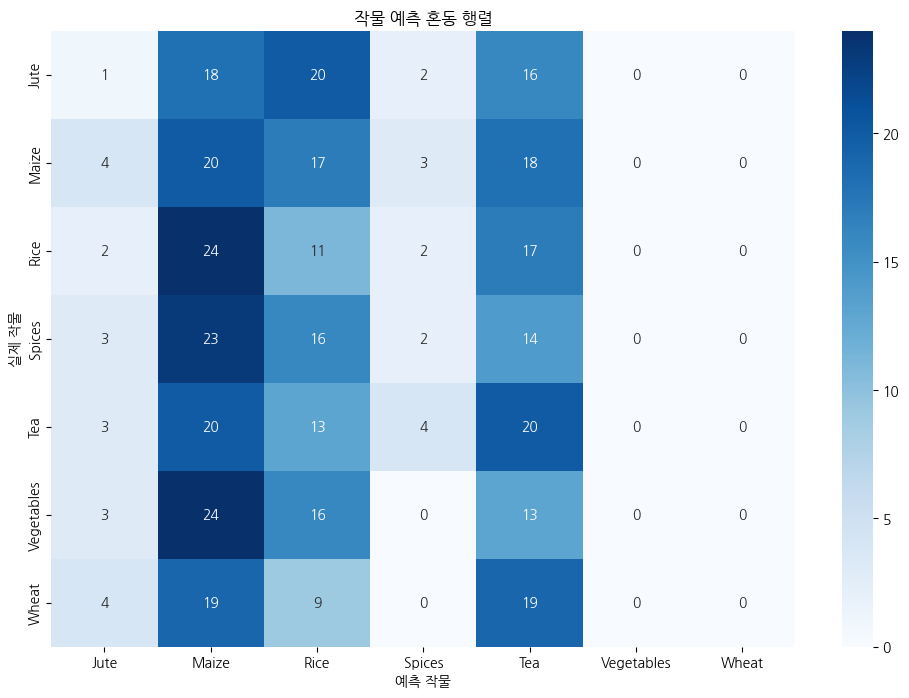

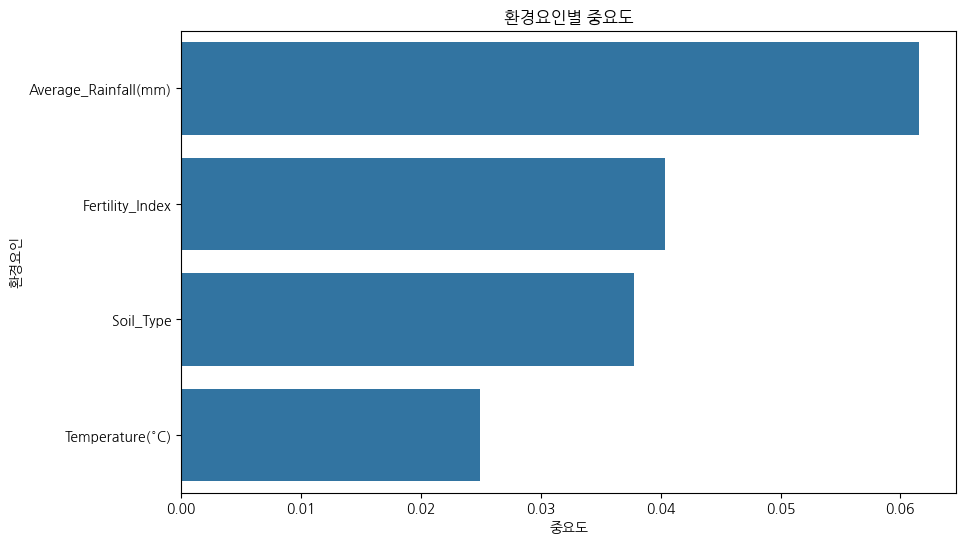

c:\Ai_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ai_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ai_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Jute,0.050,0.018,0.026,57.000
Maize,0.135,0.323,0.190,62.000
Rice,0.108,0.196,0.139,56.000
Spices,0.154,0.034,0.056,58.000
Tea,0.171,0.333,0.226,60.000
Vegetables,0.000,0.000,0.000,56.000
Wheat,0.000,0.000,0.000,51.000
accuracy,0.135,0.135,0.135,0.135
macro avg,0.088,0.129,0.091,400.000
weighted avg,0.091,0.135,0.095,400.000



각 작물별 최적 환경 조건:


,평균 강수량,평균 온도,평균 비옥도
Wheat,219.00,27.38,68.91
Maize,218.79,27.39,70.68
Rice,231.05,27.25,70.64
Vegetables,229.22,27.41,71.09
Tea,225.77,27.13,68.78
Jute,216.63,27.35,70.18
Spices,221.54,27.41,70.37


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:.2f}'.format

def train_logistic_regression(X_train, X_test, y_train, y_test):
    # 1. 모델 생성 및 학습
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    
    # 2. 예측
    y_pred = lr_model.predict(X_test)
    
    # 3. 성능 평가
    print("\n=== 로지스틱 회귀 모델 성능 평가 ===")
    
    # 3.1 정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n정확도(Accuracy): {accuracy:.4f}")
    
    # 3.2 자세한 분류 리포트
    print("\n분류 리포트:")
    print(classification_report(y_test, y_pred, zero_division=1))
    
    # 3.3 혼동 행렬 시각화
    plt.figure(figsize=(12, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(y_train.unique()),
                yticklabels=sorted(y_train.unique()))
    plt.title('작물 예측 혼동 행렬')
    plt.ylabel('실제 작물')
    plt.xlabel('예측 작물')
    plt.show()
    
    # 3.4 특성 중요도
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': np.abs(lr_model.coef_).mean(axis=0)
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('환경요인별 중요도')
    plt.xlabel('중요도')
    plt.ylabel('환경요인')
    plt.show()
    
    # 3.5 각 작물별 예측 정확도
    crop_accuracy = pd.DataFrame(classification_report(y_test, y_pred, 
                                                     output_dict=True)).T
    display(crop_accuracy.style.format("{:.3f}"))
    
    return lr_model, accuracy, y_pred, feature_importance, crop_accuracy

# 데이터 로드
df = pd.read_csv('dataset/agriculturalDataset.csv')

# 전처리
core_features = {
    'environmental_numeric': [
        'Average_Rainfall(mm)',
        'Temperature(°C)',
        'Fertility_Index'
    ],
    'environmental_categorical': [
        'Soil_Type'
    ],
    'target': 'Crop_Suitability'
}

# 필요한 컬럼만 선택
selected_columns = (
    core_features['environmental_numeric'] + 
    core_features['environmental_categorical'] + 
    [core_features['target']]
)
df_selected = df[selected_columns].copy()

# 토양 유형 인코딩
from sklearn.preprocessing import LabelEncoder
le_soil = LabelEncoder()
df_selected['Soil_Type'] = le_soil.fit_transform(df_selected['Soil_Type'])

# 환경요인(X)과 작물적합성(y) 분리
X = df_selected.drop(core_features['target'], axis=1)
y = df_selected[core_features['target']]

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 모델 학습 및 평가
lr_model, accuracy, predictions, feature_importance, crop_accuracy = train_logistic_regression(
    X_train, X_test, y_train, y_test
)

# 추가적인 분석: 각 작물별 최적 환경 조건
crop_conditions = pd.DataFrame()
for crop in y.unique():
    crop_data = df[df['Crop_Suitability'] == crop]
    crop_conditions[crop] = {
        '평균 강수량': crop_data['Average_Rainfall(mm)'].mean(),
        '평균 온도': crop_data['Temperature(°C)'].mean(),
        '평균 비옥도': crop_data['Fertility_Index'].mean()
    }

print("\n각 작물별 최적 환경 조건:")
display(crop_conditions.T)